   watch_time_hour genre_preference  avg_rating_given  cluster
0               13           action          2.037554        2
1                4           comedy          1.350365        2
2               15         thriller          1.359665        2
3               14         thriller          1.772998        2
4               14           comedy          1.202237        2


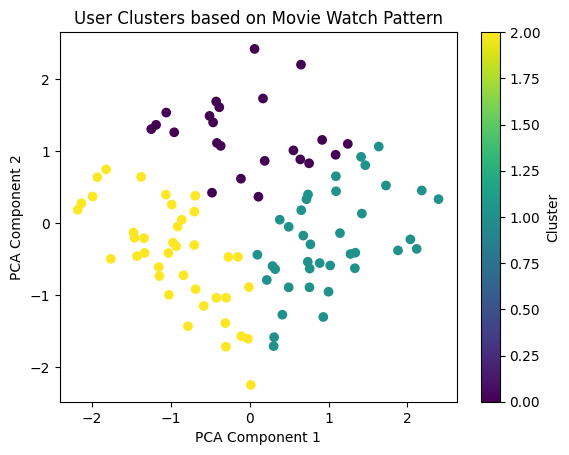

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/movie_watch.csv")

# Define preprocessing for numerical and categorical columns
numeric_features = ['watch_time_hour', 'avg_rating_given']
categorical_features = ['genre_preference']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline that first transforms the data then applies KMeans
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clusterer', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline
pipeline.fit(df)

# Predict clusters
df['cluster'] = pipeline.predict(df)

# Display cluster assignment
print(df.head())

# Optional: Plotting (only 2D example using PCA)
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
X_transformed = pipeline.named_steps['preprocessor'].transform(df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title("User Clusters based on Movie Watch Pattern")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()
